## Setup and initialize

In [1]:
from swat import *
from pprint import pprint
from matplotlib import pyplot as plt
import pandas as pd
import sys
%matplotlib inline

#indata_dir="/home/sasdemo/Examples/data"

indata_dir="../Examples/data"
indata="hmeq"

#### Start CAS session

In [2]:
sess = CAS('centis', 5570,'sasdemo', 'SASpw123')
print(sess);

sess.loadactionset(actionset="dataStep")
sess.loadactionset(actionset="dataPreprocess")
sess.loadactionset(actionset="cardinality")
sess.loadactionset(actionset="sampling")
sess.loadactionset(actionset="regression")
sess.loadactionset(actionset="decisionTree")
sess.loadactionset(actionset="neuralNet")
sess.loadactionset(actionset="svm")
sess.loadactionset(actionset="astore")
sess.loadactionset(actionset="percentile")

CAS(u'centis', 5570, u'sasdemo', protocol=u'cas', name=u'py-session-1', session=u'7136990d-cc6b-5448-beaa-8fa8a1a426a2')
NOTE: Added action set 'dataStep'.
NOTE: Added action set 'dataPreprocess'.
NOTE: Added action set 'cardinality'.
NOTE: Added action set 'sampling'.
NOTE: Added action set 'regression'.
NOTE: Added action set 'decisionTree'.
NOTE: Added action set 'neuralNet'.
NOTE: Added action set 'svm'.
NOTE: Added action set 'astore'.
NOTE: Added action set 'percentile'.


[actionset]

 u'percentile'

+ Elapsed: 0.00039s, sys: 0.000699s, mem: 0.0287mb

## Load data into CAS

In [3]:
if not sess.table.tableExists(table=indata).exists:
    sess.loadTable(caslib="casuser", path=indata_dir+"/"+indata+".sas7bdat", casout={"name":indata})

NOTE: Cloud Analytic Services made the file ../Examples/data/hmeq.sas7bdat available as table HMEQ in caslib CASUSER(sasdemo).


## Ask for CAS server status

In [4]:
r=sess.builtins.serverStatus()
sess.tableinfo()

NOTE: Grid node action status report: 1 nodes, 40 total actions executed.


,Name,Rows,Columns,Encoding,CreateTimeFormatted,ModTimeFormatted,JavaCharSet,CreateTime,ModTime,Global,Repeated,View,SourceName,SourceCaslib,Compressed,Creator,Modifier
0,HMEQ,5960,13,utf-8,07. Januar 2017 07.53 Uhr,07. Januar 2017 07.53 Uhr,UTF8,1.799395e+09,1.799395e+09,0,0,0,../Examples/data/hmeq.sas7bdat,CASUSER(sasdemo),0,sasdemo,
1,DONOR_RAW_DATA,19372,50,utf-8,07. Januar 2017 04.26 Uhr,07. Januar 2017 04.26 Uhr,UTF8,1.799382e+09,1.799382e+09,1,0,0,,,0,sasdemo,


In [5]:
hmeq = sess.CASTable("HMEQ")
hmeq.columninfo()

,Column,ID,Type,RawLength,FormattedLength,NFL,NFD
0,BAD,1,double,8,12,0,0
1,LOAN,2,double,8,12,0,0
2,MORTDUE,3,double,8,12,0,0
3,VALUE,4,double,8,12,0,0
4,REASON,5,char,7,7,0,0
5,JOB,6,char,7,7,0,0
6,YOJ,7,double,8,12,0,0
7,DEROG,8,double,8,12,0,0
8,DELINQ,9,double,8,12,0,0
9,CLAGE,10,double,8,12,0,0


In [6]:
hmeq.fetch(to=10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1.0,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1.0,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1.0,1500.0,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1.0,1700.0,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1.0,1800.0,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1.0,1800.0,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1.0,2000.0,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1.0,2000.0,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


## Explore and Impute missing values

#### Explore data and plot missing values

NOTE: Writing cardinality.
NOTE: status = 0.
NOTE: The Cloud Analytic Services server processed the request in 0,000510455 seconds.
----------------------------------Data Summary----------------------------------


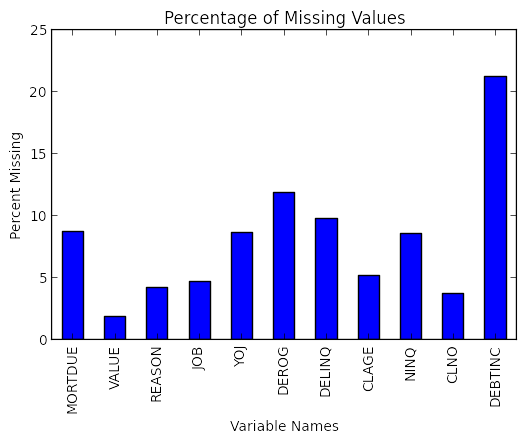

In [7]:
sess.cardinality.summarize(
  table={"name":indata}, 
  cardinality={"name":"data_card", "replace":True}
)

tbl_data_card=sess.CASTable('data_card')
tbl_data_card.where='_NMISS_>0'
print("Data Summary".center(80, '-')) # print title
tbl_data_card.fetch() # print obs

tbl_data_card.vars=['_VARNAME_', '_NMISS_', '_NOBS_']
allRows=20000  # Assuming max rows in data_card table is <= 20,000
df_data_card=tbl_data_card.fetch(to=allRows)['Fetch']
df_data_card['PERCENT_MISSING']=(df_data_card['_NMISS_']/df_data_card['_NOBS_'])*100

tbl_forplot=pd.Series(list(df_data_card['PERCENT_MISSING']), index=list(df_data_card['_VARNAME_']))
ax=tbl_forplot.plot(
  kind='bar', 
  title='Percentage of Missing Values'
)
ax.set_ylabel('Percent Missing')
ax.set_xlabel('Variable Names')

#### Impute missing values

In [8]:
sess.dataPreprocess.transform(
  table={"name":indata},
  casOut={"name":"hmeq_prepped", "replace":True},
  copyAllVars=True,
  outVarsNameGlobalPrefix="IM",
  requestPackages=[
    {"impute":{"method":"MEAN"}, "inputs":{"clage"}},
    {"impute":{"method":"MEDIAN"}, "inputs":{"delinq"}},
    {"impute":{"method":"RANDOM"}, "inputs":{"ninq"}},
    {"impute":{"method":"VALUE", "valuesContinuous":{50, 100}}, "inputs":{"debtinc", "yoj"}}
  ]
)

[TransInfo]

 Transformationsanfragen für HMEQ
 
   ActualName  NTransVars ImputeMethod          Seed
 0       _TR1           1         Mean           NaN
 1       _TR2           1       Median           NaN
 2       _TR3           1       Random  1.799395e+09
 3       _TR4           2        Value           NaN

[VarTransInfo]

 Informationen zu Variablentransformation für HMEQ
 
   Variable Transformation   ResultVar     N  NMiss  ImputedValueContinuous
 0    CLAGE             IM    IM_CLAGE  5652    308              179.766275
 1  DEBTINC             IM  IM_DEBTINC  4693   1267               50.000000
 2   DELINQ             IM   IM_DELINQ  5380    580                0.000000
 3     NINQ             IM     IM_NINQ  5450    510                     NaN
 4      YOJ             IM      IM_YOJ  5445    515              100.000000

[OutputCasTables]

              casLib          Name  Rows  Columns  \
 0  CASUSER(sasdemo)  hmeq_prepped  5960       18   
 
                                             casTable  
 0  CASTable(u'hmeq_prepped', caslib=u'CASUSER(sas...

## Partition data into Training and Validation

In [9]:
sess.sampling.stratified(
  table={"name":"hmeq_prepped", "groupBy":"bad"},
  output={"casOut":{"name":"hmeq_part", "replace":True}, "copyVars":"ALL"},
  samppct=70,
  partind=True
)

NOTE: Mit SEED=1014768535 f�r Sampling.


[outputSize]

 {u'outputNObs': 5960.0, u'outputNVars': 19}

[STRAFreq]

 Häufigkeiten
 
    ByGrpID           BAD  NObs  NSamp
 0        0             0  4771   3340
 1        1             1  1189    832

[OutputCasTables]

              casLib       Name Label  Rows  Columns  \
 0  CASUSER(sasdemo)  hmeq_part        5960       19   
 
                                             casTable  
 0  CASTable(u'hmeq_part', caslib=u'CASUSER(sasdem...

In [32]:
hmeq_part = sess.CASTable("hmeq_part")
hmeq_part.fetch(to=10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,IM_CLAGE,IM_DEBTINC,IM_DELINQ,IM_NINQ,IM_YOJ,_PartInd_
0,1.0,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,94.366667,50.000000,0.0,1.000000,10.5,0.0
1,1.0,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,121.833333,50.000000,2.0,0.000000,7.0,0.0
2,1.0,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,149.466667,50.000000,0.0,1.000000,4.0,1.0
3,1.0,1500.0,NaN,NaN,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.766275,50.000000,0.0,0.187146,100.0,1.0
4,0.0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,93.333333,50.000000,0.0,0.000000,3.0,1.0
5,1.0,1700.0,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,101.466002,37.113614,0.0,1.000000,9.0,1.0
6,1.0,1800.0,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN,77.100000,50.000000,2.0,1.000000,5.0,0.0
7,1.0,1800.0,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,88.766030,36.884894,0.0,0.000000,11.0,1.0
8,1.0,2000.0,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN,216.933333,50.000000,2.0,1.000000,3.0,1.0
9,1.0,2000.0,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN,115.800000,50.000000,0.0,0.000000,16.0,0.0


## Decision Tree

In [10]:
sess.decisionTree.dtreeTrain(
  table={
    "name":"hmeq_part",
    "where":"strip(put(_partind_, best.))='1'"
  },
  inputs={"reason", "job", "im_clage", "clno", "im_debtinc", "loan", "mortdue", 
          "value", "im_yoj", "im_ninq", "derog", "im_delinq"},
  target="bad",
  nominals={"bad", "reason", "job"},
  crit="GAIN",
  prune=True,
  varImp=True,
  missing="USEINSEARCH",
  casOut={"name":"tree_model", "replace":True}
)

# Score 
sess.decisionTree.dtreeScore(
  table={"name":"hmeq_part"},
  modelTable={"name":"tree_model"},
  casOut={"name":"_scored_tree", "replace":True},
  copyVars={"bad", "_partind_"}
)

# Create p_bad0 and p_bad1 as _dt_predp_ is the probability of event in _dt_predname_
sess.dataStep.runCode(
  code="data _scored_tree; set _scored_tree; if _dt_predname_=1 then do; p_bad1=_dt_predp_; p_bad0=1-p_bad1; end; if _dt_predname_=0 then do; p_bad0=_dt_predp_; p_bad1=1-p_bad0; end; run;"
)

NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).
      0:39    0:108
NOTE: Duplicate messages output by DATA step:
NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).  (occurred 6 times)
      0:39    0:108  (occurred 6 times)


,casLib,Name,Rows,Columns,casTable
0,CASUSER(sasdemo),_scored_tree,5960,14,"CASTable(u'_scored_tree', caslib=u'CASUSER(sas..."


## Random Forest

In [11]:
sess.decisionTree.forestTrain(
  table={
    "name":"hmeq_part",
    "where":"strip(put(_partind_, best.))='1'"
  },
  inputs={"reason", "job", "im_clage", "clno", "im_debtinc", "loan", "mortdue", 
          "value", "im_yoj", "im_ninq", "derog", "im_delinq"},
  nominals={"bad", "reason", "job"},
  target="bad",
  nTree=50,
  nBins=20,
  leafSize=5,
  maxLevel=21,
  crit="GAINRATIO",
  varImp=True,
  missing="USEINSEARCH",
  vote="PROB",
  casOut={"name":"forest_model", "replace":True}
)

# Score 
sess.decisionTree.forestScore(
  table={"name":"hmeq_part"},
  modelTable={"name":"forest_model"},
  casOut={"name":"_scored_rf", "replace":True},
  copyVars={"bad", "_partind_"},
  vote="PROB"
)

# Create p_bad0 and p_bad1 as _rf_predp_ is the probability of event in _rf_predname_
sess.dataStep.runCode(
  code="data _scored_rf; set _scored_rf; if _rf_predname_=1 then do; p_bad1=_rf_predp_; p_bad0=1-p_bad1; end; if _rf_predname_=0 then do; p_bad0=_rf_predp_; p_bad1=1-p_bad0; end; run;"
)

NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).
      0:35    0:104
NOTE: Duplicate messages output by DATA step:
NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).  (occurred 6 times)
      0:35    0:104  (occurred 6 times)


,casLib,Name,Rows,Columns,casTable
0,CASUSER(sasdemo),_scored_rf,5960,7,"CASTable(u'_scored_rf', caslib=u'CASUSER(sasde..."


## Gradient Boosting Machine

In [12]:
sess.decisionTree.gbtreeTrain(
  table={
    "name":"hmeq_part",
    "where":"strip(put(_partind_, best.))='1'"
  },
  inputs={"reason", "job", "im_clage", "clno", "im_debtinc", "loan", "mortdue", 
          "value", "im_yoj", "im_ninq", "derog", "im_delinq"},
  nominals={"bad", "reason", "job"},
  target="bad",
  nTree=10,
  nBins=20,
  maxLevel=6,
  varImp=True,
  missing="USEINSEARCH",
  casOut={"name":"gb_model", "replace":True}
)

# Score 
sess.decisionTree.gbtreeScore(
  table={"name":"hmeq_part"},
  modelTable={"name":"gb_model"},
  casOut={"name":"_scored_gb", "replace":True},
  copyVars={"bad", "_partind_"}
)

# Create p_bad0 and p_bad1 as _gbt_predp_ is the probability of event in _gbt_predname_
sess.dataStep.runCode(
  code="data _scored_gb; set _scored_gb; if _gbt_predname_=1 then do; p_bad1=_gbt_predp_; p_bad0=1-p_bad1; end; if _gbt_predname_=0 then do; p_bad0=_gbt_predp_; p_bad1=1-p_bad0; end; run;"
)

NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).
      0:35    0:106
NOTE: Duplicate messages output by DATA step:
NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).  (occurred 6 times)
      0:35    0:106  (occurred 6 times)


,casLib,Name,Rows,Columns,casTable
0,CASUSER(sasdemo),_scored_gb,5960,6,"CASTable(u'_scored_gb', caslib=u'CASUSER(sasde..."


## Neural Network

In [13]:
sess.neuralNet.annTrain(
  table={
    "name":"hmeq_part",
    "where":"strip(put(_partind_, best.))='1'"
  },
  validTable={
    "name":"hmeq_part",
    "where":"strip(put(_partind_, best.))='0'"
  },
  inputs={"reason", "job", "im_clage", "clno", "im_debtinc", "loan", "mortdue", 
          "value", "im_yoj", "im_ninq", "derog", "im_delinq"},
  nominals={"bad", "reason", "job"},
  target="bad",
  hiddens={2},
  acts={"TANH"},
  combs={"LINEAR"},
  targetAct="SOFTMAX",
  errorFunc="ENTROPY",
  std="MIDRANGE",
  randDist="UNIFORM",
  scaleInit=1,
  nloOpts={
    "optmlOpt":{"maxIters":250, "fConv":1e-10}, 
    "lbfgsOpt":{"numCorrections":6},
    "printOpt":{"printLevel":"printDetail"},
    "validate":{"frequency":1}
  },
  casOut={"name":"nnet_model", "replace":True}
)

# Score 
sess.neuralNet.annScore(
  table={"name":"hmeq_part"},
  modelTable={"name":"nnet_model"},
  casOut={"name":"_scored_nn", "replace":True},
  copyVars={"bad", "_partind_"}
)

# Create p_bad0 and p_bad1 as _nn_predp_ is the probability of event in _nn_predname_
sess.dataStep.runCode(
  code="data _scored_nn; set _scored_nn; if _nn_predname_=1 then do; p_bad1=_nn_predp_; p_bad0=1-p_bad1; end; if _nn_predname_=0 then do; p_bad0=_nn_predp_; p_bad1=1-p_bad0; end; run;"
)

NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).
      0:35    0:104
NOTE: Duplicate messages output by DATA step:
NOTE: Character values have been converted to numeric values at the places given by: (Line):(Column).  (occurred 6 times)
      0:35    0:104  (occurred 6 times)


,casLib,Name,Rows,Columns,casTable
0,CASUSER(sasdemo),_scored_nn,5960,4,"CASTable(u'_scored_nn', caslib=u'CASUSER(sasde..."


## Support Vector Machine

In [14]:
sess.svm.svmTrain(
  table={
    "name":"hmeq_part", 
    "where":"strip(put(_partind_, best.))='1'"
  },
  inputs={"reason", "job", "im_clage", "clno", "im_debtinc", "loan", "mortdue", 
          "value", "im_yoj", "im_ninq", "derog", "im_delinq"},
  nominals={"bad", "reason", "job"},
  target="bad",
  kernel="POLYNOMIAL",
  degree=2,
  id={"bad", "_partind_"},
  savestate={"name":"svm_astore_model", "replace":True}
)

# Score using ASTORE
sess.astore.score(
  table={"name":"hmeq_part"},
  rstore={"name":"svm_astore_model"},
  out={"name":"_scored_svm", "replace":True}
)

NOTE: SVM training is activated.
NOTE: Wrote 10261 bytes to the savestate file svm_astore_model.


,Task,Seconds,Percent
0,Laden des Speichers,0.000014,0.000069
1,Erstellen des Status,0.001695,0.008301
2,Scoring,0.202476,0.991621
3,Summe,0.204187,1.000000


## Assess Models

In [15]:
def assess_model(prefix):
    return sess.percentile.assess(
      table={
        "name":"_scored_" + prefix, 
        "where": "strip(put(_partind_, best.))='0'"
      },
      inputs=[{"name":"p_bad1"}],      
      response="bad",
      event="1",
      pVar={"p_bad0"},
      pEvent={"0"}      
    )

treeAssess=assess_model(prefix="tree")    
tree_fitstat =treeAssess.FitStat
tree_rocinfo =treeAssess.ROCInfo
tree_liftinfo=treeAssess.LIFTInfo

rfAssess=assess_model(prefix="rf")    
rf_fitstat =rfAssess.FitStat
rf_rocinfo =rfAssess.ROCInfo
rf_liftinfo=rfAssess.LIFTInfo

gbAssess=assess_model(prefix="gb")    
gb_fitstat =gbAssess.FitStat
gb_rocinfo =gbAssess.ROCInfo
gb_liftinfo=gbAssess.LIFTInfo

nnAssess=assess_model(prefix="nn")    
nn_fitstat =nnAssess.FitStat
nn_rocinfo =nnAssess.ROCInfo
nn_liftinfo=nnAssess.LIFTInfo

svmAssess=assess_model(prefix="svm")    
svm_fitstat =svmAssess.FitStat
svm_rocinfo =svmAssess.ROCInfo
svm_liftinfo=svmAssess.LIFTInfo

## Create ROC and Lift plots (using Validation data)

#### Prepare assessment results for plotting

In [16]:
# Add new variable to indicate type of model
tree_liftinfo["model"]="DecisionTree"
tree_rocinfo["model"]="DecisionTree"
rf_liftinfo["model"]="Forest"
rf_rocinfo["model"]="Forest"
gb_liftinfo["model"]="GradientBoosting"
gb_rocinfo["model"]="GradientBoosting"
nn_liftinfo["model"]="NeuralNetwork"
nn_rocinfo["model"]="NeuralNetwork"
svm_liftinfo["model"]="SVM"
svm_rocinfo["model"]="SVM"

# Append data
all_liftinfo=rf_liftinfo.append(gb_liftinfo, ignore_index=True).append(nn_liftinfo, ignore_index=True).append(svm_liftinfo, ignore_index=True).append(tree_liftinfo, ignore_index=True)
all_rocinfo=rf_rocinfo.append(gb_rocinfo, ignore_index=True).append(nn_rocinfo, ignore_index=True).append(svm_rocinfo, ignore_index=True).append(tree_rocinfo, ignore_index=True)

#### Print AUC (Area Under the ROC Curve)

In [17]:
print("AUC (using validation data)".center(80, '-'))
all_rocinfo[["model", "C"]].drop_duplicates(keep="first").sort_values(by="C", ascending=False)

--------------------------AUC (using validation data)---------------------------


,model,C
0,Forest,0.939413
100,GradientBoosting,0.914880
200,NeuralNetwork,0.885729
300,SVM,0.869926
400,DecisionTree,0.869298


#### Draw ROC and Lift plots

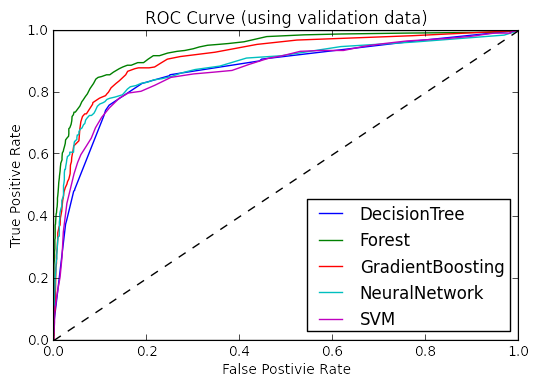

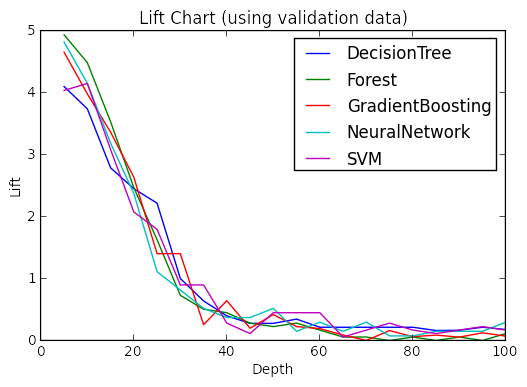

In [18]:
#/* Draw ROC charts */ 
plt.figure()
for key, grp in all_rocinfo.groupby(["model"]):
    plt.plot(grp["FPR"], grp["Sensitivity"], label=key)
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Postivie Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.title("ROC Curve (using validation data)")
plt.show()

#/* Draw lift charts */
plt.figure()
for key, grp in all_liftinfo.groupby(["model"]):
    plt.plot(grp["Depth"], grp["Lift"], label=key)
plt.xlabel("Depth")
plt.ylabel("Lift")
plt.legend(loc="best")
plt.title("Lift Chart (using validation data)")
plt.show()

## End CAS session

In [19]:
sess.close()